# Supervised Learning - Regression

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


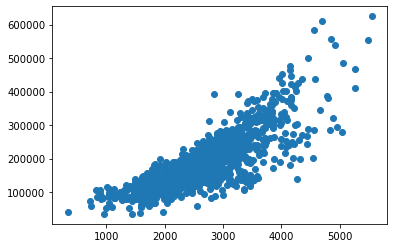

In [3]:
%pylab inline
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/rezpe/datos_viz/master/house_prices.csv")
df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']
df=df[df["TotalSF"]<6000]

# Data Preparation
X = df[['TotalSF']] # pandas DataFrame
y = df["SalePrice"] # pandas Series

plt.scatter(X,y);

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalSF
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,2566
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,2524
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,2706
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,2473
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,3343


In [5]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
X.head()

,TotalSF
0,2566
1,2524
2,2706
3,2473
4,3343


In [7]:
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [8]:
type(X)

pandas.core.frame.DataFrame

In [9]:
type(y)

pandas.core.series.Series

## Regresión Lineal Simple

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
reg = LinearRegression()

In [12]:
reg.fit(X,y)

LinearRegression()

In [13]:
X_pred = pd.DataFrame([[1000], [1500], [4000]])
X_pred

,0
0,1000
1,1500
2,4000


In [14]:
reg.predict(X_pred)

array([ 50217.33439988,  92112.97793231, 301591.19559442])

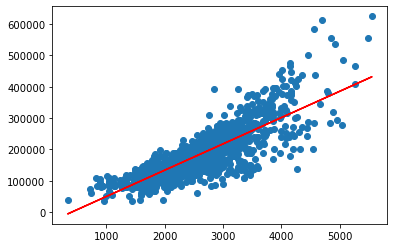

In [15]:
y_pred = reg.predict(X)
plt.scatter(X,y)
plt.plot(X, y_pred, c='r')

In [16]:
np.corrcoef(X['TotalSF'], y)

array([[1.        , 0.82403696],
       [0.82403696, 1.        ]])

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [19]:
reg.fit(X_train, y_train)

LinearRegression()

In [20]:
y_pred = reg.predict(X_test)

In [21]:
from sklearn.metrics import mean_absolute_error

In [22]:
mean_absolute_error(y_test, y_pred) # Primero valor real y luego predicción (MAE)

31020.85978003814

## K-Nearest Neighbors (K-NN)

In [23]:
from sklearn.neighbors import KNeighborsRegressor

In [24]:
regk = KNeighborsRegressor(n_neighbors=5)

In [25]:
regk.fit(X_train,y_train)

KNeighborsRegressor()

In [26]:
y_predk = regk.predict(X_test)

In [27]:
mean_absolute_error(y_test, y_predk)  # MAE

32103.24948453609

In [28]:
# RMSE: Otra métrica para comprobar la precisión

from sklearn.metrics import mean_squared_error

In [29]:
np.sqrt(mean_squared_error(y_test, y_pred)) # # RMSE: De la Regresión Lineal

44268.38992703249

In [30]:
np.sqrt(mean_squared_error(y_test, y_predk)) # RMSE: Del KNN

47188.575820499296

## Cross Validation

El modelo cada vez utiliza partes distintas para Train y Test y obtenemos como resultado la métrica de cada iteración  
Evalúa 1 modelo

In [31]:
from sklearn.model_selection import cross_val_score

In [32]:
cross_val_score(reg,X,y,scoring='neg_mean_absolute_error')

array([-31590.33866136, -31060.2137948 , -30549.12490917, -29461.90971854,
       -32604.542219  ])

In [33]:
cross_val_score(reg,X,y,scoring='neg_mean_absolute_error').mean() # Regresión Lineal

-31053.225860573915

In [34]:
cross_val_score(regk,X,y,scoring='neg_mean_absolute_error').mean() # KNN

-32105.07298969072

## Testing Parameters: Grid Search CV

En este caso, para obtener el **N óptimo de KNN**  
Buscar el número de vecinos óptimo para comparar con la regresión lineal  
Evalúa varios modelos y se queda con el mejor

In [35]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# RandomizedSearchCV para reducir el número de pruebas

In [36]:
reg_gs = GridSearchCV(KNeighborsRegressor(),
                      param_grid={'n_neighbors':[3,4,5,6]},
                      scoring='neg_mean_absolute_error')
reg_gs.fit(X,y)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [3, 4, 5, 6]},
             scoring='neg_mean_absolute_error')

In [37]:
reg_gs.best_params_ # El mejor resultado es 6

{'n_neighbors': 6}

In [38]:
reg_gs = GridSearchCV(KNeighborsRegressor(),
                      param_grid={'n_neighbors':np.arange(3,50)},
                      scoring='neg_mean_absolute_error')
reg_gs.fit(X,y)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             scoring='neg_mean_absolute_error')

In [39]:
reg_gs.best_params_ # Ahora es 44

{'n_neighbors': 44}

In [40]:
# Probamos con n=44

regk = KNeighborsRegressor(n_neighbors=44)
cross_val_score(regk,X,y,scoring='neg_mean_absolute_error').mean() # KNN n=44 es mejor que Reg. Lin.

-30279.436191815057

In [41]:
regk.fit(X,y)

KNeighborsRegressor(n_neighbors=44)

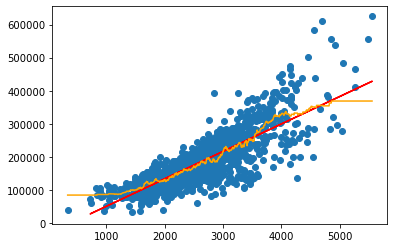

In [42]:
plt.scatter(X,y)
plt.plot(X_test, y_pred, c='r')
area_ficticias = np.linspace(X['TotalSF'].min(), X['TotalSF'].max(), 1000)
plt.plot(area_ficticias, regk.predict(pd.DataFrame(area_ficticias)), c = 'orange')

In [44]:
# Ver bucle y gráfica para la mejor métrica

from tqdm import tqdm_notebook as tqdm

metricas=[]
for k in tqdm(np.arange(10,200)):
  regkt = KNeighborsRegressor(n_neighbors=k)
  res = cross_val_score(regkt,X,y,scoring="neg_mean_absolute_error").mean()
  metricas.append(res)

<ipython-input-44-78705411b614>:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for k in tqdm(np.arange(10,200)):


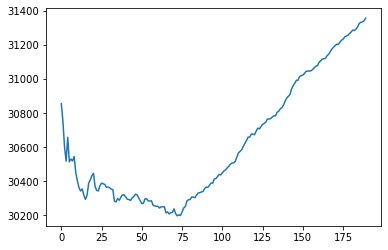

In [45]:
plt.plot(-np.array(metricas)) # El mejor resultado está cerca de 74-75

## Árboles de Decisión

In [46]:
from sklearn.tree import DecisionTreeRegressor

In [47]:
regd = DecisionTreeRegressor(max_depth=3)

In [48]:
cross_val_score(regd,X,y,scoring='neg_mean_absolute_error').mean()

-30922.044940415257

In [49]:
regt_gs = GridSearchCV(DecisionTreeRegressor(),
                      param_grid={'max_depth':np.arange(2,11),
                                  'min_samples_leaf':np.arange(10,100,15)},
                      scoring='neg_mean_absolute_error')
regt_gs.fit(X,y)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'min_samples_leaf': array([10, 25, 40, 55, 70, 85])},
             scoring='neg_mean_absolute_error')

In [50]:
regt_gs.best_params_

{'max_depth': 5, 'min_samples_leaf': 40}

In [51]:
regd = DecisionTreeRegressor(max_depth=5, min_samples_leaf=40) # Best params

In [52]:
cross_val_score(regd,X,y,scoring='neg_mean_absolute_error').mean()

-30334.626243915653

In [ ]:
# Ver métricas de Correlación y Bias

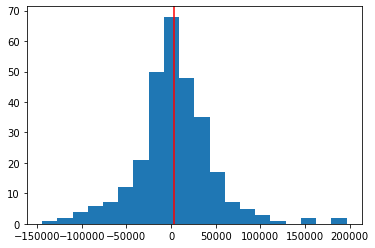

In [56]:
plt.hist(y_test-y_pred, bins = 20);
plt.axvline(x=np.mean(y_test-y_pred), c='r')

In [59]:
# Ver dibujos del Árbol

from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
from io import StringIO
dot_data = StringIO()
export_graphviz(regt_gs.best_estimator_, out_file=dot_data,filled=True, rounded=True,
 special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

InvocationException: GraphViz's executables not found

# GBoost

El principio de cómo funciona

In [60]:
regd1 = DecisionTreeRegressor(max_depth=3)

In [61]:
regd1.fit(X,y)

DecisionTreeRegressor(max_depth=3)

In [62]:
regd1.predict(X)

array([188545.29073482, 161244.78666667, 188545.29073482, ...,
       255979.16216216, 132106.74588235, 161244.78666667])

In [63]:
pred1 = regd1.predict(X)

In [64]:
restable = X.copy()
restable['y_real'] = y.copy()
restable['y_pred']=pred1
restable['res1']=restable['y_real'] - restable['y_pred']
restable.head()

,TotalSF,y_real,y_pred,res1
0,2566,208500,188545.290735,19954.709265
1,2524,181500,161244.786667,20255.213333
2,2706,223500,188545.290735,34954.709265
3,2473,140000,161244.786667,-21244.786667
4,3343,250000,228552.288344,21447.711656


In [65]:
regd2 = DecisionTreeRegressor(max_depth=3)
regd2.fit(X, restable['res1'])

DecisionTreeRegressor(max_depth=3)

In [66]:
restable['pred2'] = pred1 + .1*regd2.predict(X)
restable['res2'] = restable['y_real'] - restable['pred2']
restable.head()

# El segundo modelo predice los errores (residuos) del primero
# Mejora el residuo total

,TotalSF,y_real,y_pred,res1,pred2,res2
0,2566,208500,188545.290735,19954.709265,188547.487959,19952.512041
1,2524,181500,161244.786667,20255.213333,161246.983891,20253.016109
2,2706,223500,188545.290735,34954.709265,188547.487959,34952.512041
3,2473,140000,161244.786667,-21244.786667,161246.983891,-21246.983891
4,3343,250000,228552.288344,21447.711656,228554.485568,21445.514432
